# Лекция 4. Основы OLAP-технологий, приемы работы в консоле Linux

- Общая теория OLAP-технологий
- Построение гиперкубов в python
- Основы Linux/shell

## Общая теория OLAP-технологий

[Воспоминания из прошлой лекции](../Lection_1/Lection_1.ipynb)

OLAP-система включает в себя два основных компонента:

1. OLAP-сервер обеспечивает хранение данных, выполнение над ними необходимых операций и формирование многомерной модели на концептуальном уровне. В настоящее время OLAP-серверы объединяют с хранилищами данных или витринами данных.

2. OLAP-клиент представляет пользователю интерфейс к многомерной модели данных, обеспечивая его возможностью удобно манипулировать данными для выполнения задач анализа.

OLAP-серверы скрывают от конечного пользователя способ реализации многомерной модели. Они формируют гиперкуб, с которым пользователи посредством OLAP-клиента выполняют все необходимые манипуляции, анализируя данные. Между тем способ реализации очень важен, т. к. от него зависят такие характеристики, как производительность и занимаемые ресурсы. Выделяют три основных способа реализации:

- **MOLAP** -  для реализации многомерной модели используют многомерные БД;

- **ROLAP** - для реализации многомерной модели используют реляционные БД;

- **HOLAP** -  для реализации многомерной модели используют и многомерные и реляционные БД.

В литературе по OLAP-системам можно также встретить аббревиатуры **DOLAP** и **JOLAP**.

**DOLAP** настольный (desktop) OLAP. Является недорогой и простой в использовании OLAP-системой, предназначенной для локального анализа и представления данных, которые загружаются из реляционной или многомерной БД на машину клиента.

**JOLAP** - основанная на Java OLAP-API, предназначенная для создания и управления данными и метаданными на серверах OLAP, все аспекты этого API объектно-ориентированы. Основной разработчик — Hyperion Solutions. Другими членами группы являются компании IBM, Oracle и др.

### MOLAP
MOLAP-серверы используют для хранения и управления данными многомерные БД. При этом данные хранятся в виде упорядоченных многомерных массивов. Такие массивы подразделяются на гиперкубы и поликубы.

В гиперкубе все хранимые в БД ячейки имеют одинаковую мерность, т. е. находятся в максимально полном базисе измерений.

В поликубе каждая ячейка хранится с собственным набором измерений, и все связанные с этим сложности обработки перекладываются на внутренние механизмы системы.

Физически данные, представленные в многомерном виде, хранятся в "плоских" файлах. При этом куб представляется в виде одной плоской таблицы, в которую построчно вписываются все комбинации членов всех измерений с соответствующими им значениями мер.

Можно выделить следующие преимущества использования многомерных БД в OLAP-системах:

- поиск и выборка данных осуществляются значительно быстрее, чем при многомерном концептуальном взгляде на реляционную БД, т. к. многомерная база данных денормализована и содержит заранее агрегированные показатели, обеспечивая оптимизированный доступ к запрашиваемым ячейкам и не требуя дополнительных преобразований при переходе от множества связанных таблиц к многомерной модели;

- многомерные БД легко справляются с задачами включения в информационную модель разнообразных встроенных функций, тогда как объективно существующие ограничения языка SQL делают выполнение этих задач на основе реляционных БД достаточно сложным, а иногда и невозможным.

С другой стороны, имеются также существенные недостатки:

- за счет денормализации и предварительно выполненной агрегации объем данных в многомерной БД, как правило, соответствует (по оценке Кодда) в 2,5...100 раз меньшему объему исходных детализированных данных;

- в подавляющем большинстве случаев информационный гиперкуб является сильно разреженным, а поскольку данные хранятся в упорядоченном виде, неопределенные значения удается удалить только за счет выбора оптимального порядка сортировки, позволяющего организовать данные в максимально большие непрерывные группы. Но даже в этом случае проблема решается только частично. Кроме того, оптимальный с точки зрения хранения разреженных данных порядок сортировки, скорее всего, не будет совпадать с порядком, который чаще всего используется в запросах. Поэтому в реальных системах приходится искать компромисс между быстродействием и избыточностью дискового пространства, занятого базой данных;

- многомерные БД чувствительны к изменениям в многомерной модели. Так при добавлении нового измерения приходится изменять структуру всей БД, что влечет за собой большие затраты времени.

На основании анализа достоинств и недостатков многомерных БД можно выделить следующие условия, при которых их использование является эффективным:

- объем исходных данных для анализа не слишком велик (не более нескольких гигабайт), т. е. уровень агрегации данных достаточно высок;

- набор информационных измерений стабилен;

- время ответа системы на нерегламентированные запросы является наиболее критичным параметром;

- требуется широкое использование сложных встроенных функций для выполнения кроссмерных вычислений над ячейками гиперкуба, в том числе возможность написания пользовательских функций.

### ROLAP

ROLAP-серверы используют реляционные БД. По словам Кодда, "реляционные БД являются подходящей технологией для хранения данных. Необходимость существует не в новой технологии БД, а скорее в средствах анализа, дополняющих функции существующих СУБД, и достаточно гибких, чтобы предусмотреть и автоматизировать разные виды интеллектуального анализа, присущие OLAP".

В настоящее время распространены две основные схемы реализации многомерного представления данных с помощью реляционных таблиц: схема "звезда" и схема "снежинка".

Одно измерение куба может содержаться как в одной таблице (в том числе и при наличии нескольких уровней иерархии), так и в нескольких связанных таблицах, соответствующих различным уровням иерархии в измерении. Если каждое измерение содержится в одной таблице, такая схема хранилища данных носит название «звезда».

Пример схемы звезда:

<img src="ris1.gif"/>


Основными составляющими такой схемы являются денормализованная таблица фактов (Fact Table) и множество таблиц измерений (Dimension Tables).

Таблица фактов, как правило, содержит сведения об объектах или событиях, совокупность которых будет в дальнейшем анализироваться. Обычно говорят о четырех наиболее часто встречающихся типах фактов. К ним относятся:

- факты, связанные с транзакциями (Transaction facts). Они основаны на отдельных событиях (типичными примерами которых являются телефонный звонок или снятие денег со счета с помощью банкомата);

- факты, связанные с "моментальными снимками" (Snapshot facts). Основаны на состоянии объекта (например, банковского счета) в определенные моменты времени, например на конец дня или месяца. Типичными примерами таких фактов являются объем продаж за день или дневная выручка;

- факты, связанные с элементами документа (Line-item facts). Основаны на том или ином документе (например, счете за товар или услуги) и содержат подробную информацию об элементах этого документа (например, количестве, цене, проценте скидки);

- факты, связанные с событиями или состоянием объекта (Event оr state facts). Представляют возникновение события без подробностей о нем (например, просто факт продажи или факт отсутствия таковой без иных подробностей).

Таблица фактов, как правило, содержит уникальный составной ключ, объединяющий первичные ключи таблиц измерений. При этом как ключевые, так и некоторые неключевые поля должны соответствовать измерениям гиперкуба. Помимо этого таблица фактов содержит одно или несколько числовых полей, на основании которых в дальнейшем будут получены агрегатные данные.

Для многомерного анализа пригодны таблицы фактов, содержащие как можно более подробные данные, т. е. соответствующие членам нижних уровней иерархии соответствующих измерений. В таблице фактов нет никаких сведений о том, как группировать записи при вычислении агрегатных данных. Например, в ней есть идентификаторы продуктов или клиентов, но отсутствует информация о том, к какой категории относится данный продукт или в каком городе находится данный клиент. Эти сведения, в дальнейшем используемые для построения иерархий в измерениях куба, содержатся в таблицах измерений.

Таблицы измерений содержат неизменяемые либо редко изменяемые данные. В подавляющем большинстве случаев эти данные представляют собой по одной записи для каждого члена нижнего уровня иерархии в измерении. Таблицы измерений также содержат как минимум одно описательное поле (обычно с именем члена измерения) и, как правило, целочисленное ключевое поле (обычно это суррогатный ключ) для однозначной идентификации члена измерения. Если измерение, соответствующее таблице, содержит иерархию, то такая таблица также может содержать поля, указывающие на "родителя" данного члена в этой иерархии. Каждая таблица измерений должна находиться в отношении "один-ко-многим" с таблицей фактов.

Скорость роста таблиц измерений должна быть незначительной по сравнению со скоростью роста таблицы фактов; например, новая запись в таблицу измерений, характеризующую товары, добавляется только при появлении нового товара, не продававшегося ранее.

В сложных задачах с иерархическими измерениями имеет смысл обратиться к расширенной схеме "снежинка" (Snowflake Schema). 

Пример схемы снежинка:

<img src="ris2.gif"/>

В этих случаях отдельные таблицы фактов создаются для возможных сочетаний уровней обобщения различных измерений. Это позволяет добиться лучшей производительности, но часто приводит к избыточности данных и к значительным усложнениям в структуре базы данных, в которой оказывается огромное количество таблиц фактов.

Увеличение числа таблиц фактов в базе данных определяется не только множественностью уровней различных измерений, но и тем обстоятельством, что в общем случае факты имеют разные множества измерений. При абстрагировании от отдельных измерений пользователь должен получать проекцию максимально полного гиперкуба, причем далеко не всегда значения показателей в ней должны являться результатом элементарного суммирования. Таким образом, при большом числе независимых измерений необходимо поддерживать множество таблиц фактов, соответствующих каждому возможному сочетанию выбранных в запросе измерений, что также приводит к неэкономному использованию внешней памяти, увеличению времени загрузки данных в БД схемы "звезды" из внешних источников и сложностям администрирования.



Использование реляционных БД в OLAP-системах имеет следующие достоинства:

- в большинстве случаев корпоративные хранилища данных реализуются средствами реляционных СУБД, и инструменты ROLAP позволяют производить анализ непосредственно над ними. При этом размер хранилища не является таким критичным параметром, как в случае MОLАР;

- в случае переменной размерности задачи, когда изменения в структуру измерений приходится вносить достаточно часто, ROLAP-системы с динамическим представлением размерности являются оптимальным решением, т. к. в них такие модификации не требуют физической реорганизации БД;

- реляционные СУБД обеспечивают значительно более высокий уровень защиты данных и хорошие возможности разграничения прав доступа.

Главный недостаток ROLAP по сравнению с многомерными СУБД - худшая производительность. Для обеспечения производительности, сравнимой с MOLAP, реляционные системы требуют тщательной проработки схемы базы данных и настройки индексов, т. е. больших усилий со стороны администраторов БД. Только при использовании схем типа "звезда" производительность хорошо настроенных реляционных систем может быть приближена к производительности систем на основе многомерных баз данных.

### HOLAP

HOLAP-серверы используют гибридную архитектуру, которая объединяет технологии ROLAP и MOLAP. В отличие от MOLAP, которая работает лучше, когда данные более-менее плотные, серверы ROLAP показывают лучшие параметры в тех случаях, когда данные довольно разрежены. Серверы HOLAP применяют подход ROLAP для разреженных областей многомерного пространства и подход MOLAP- для плотных областей. Серверы HOLAP разделяют запрос на несколько подзапросов, направляют их к соответствующим фрагментам данных, комбинируют результаты, а затем предоставляют результат пользователю.

### История OLAP

- **APL** (1964, IBM, Array Programming Language) — язык программирования, оптимизированный для работы с массивами, предшественник современных научных вычислительных сред, таких как MATLAB, использует функциональную парадигму программирования.

- Express  (1970, академические круги) — многомерная база данных с средствами OLAP анализа
 
- System W (1981, Comshare) впервые использована концепция гиперкубов

- Essbase (1981-83,Hyperion Solutions)

- MicroStrategy (1989), SyBase (1988)

- Business Objects (1990), Informix MetaCube

- Microsoft OLAP Services (1996) 

- Jrubik – Jpivot - saiku (2000)

- Mondrian- Pentaho (2005)

- Язык MDX  - Моша Пасумански https://en.wikipedia.org/wiki/Mosha_Pasumansky, https://web.archive.org/web/20170209083212/http://sqlblog.com/blogs/mosha/default.aspx (2008)

- 2016 - OLAP-API на Python https://en.wikipedia.org/wiki/Cubes_(OLAP_server)

## Построение гиперкубов в python

Python предоставляет различные средства для построения гиперкубов и выполнения OLAP-анализа. 

1. Интерфейс интеграции куба OLAP в блокноты Python [atoti](https://www.atoti.io/articles/atoti-interactive-visualization-in-python-notebooks/)

2. Платформа [Cubes](https://pythonhosted.org/cubes/) предоставляет простой в установке сервер [WSGI](https://ru.wikipedia.org/wiki/WSGI) веб-службы с API, который охватывает большую часть метаданных логической модели Cubes и функций просмотра агрегации. Библиотека [cubesviewer](http://www.cubesviewer.com/) - средство визуализации различных типов и наборов данных.





### Atoti - основные понятия

Для работы с atoti необходимо выполнить инсталяцию:
    
> pip3 install atoti[jupyterlab]



Для начала работы необходимо создать сеанс:

In [136]:
import atoti as tt
session = tt.Session()

Deleting existing "Unnamed" session to create the new one.


In [137]:
dir(session)

['_BaseSession__id',
 '_LocalSession__server_versions',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_block_until_widget_loaded',
 '_certificate_authority',
 '_clear',
 '_closed',
 '_config',
 '_create_flight_recording',
 '_create_query_session',
 '_create_subprocess_and_java_api',
 '_cubes',
 '_generate_auth_headers',
 '_generate_token',
 '_get_endpoint_url',
 '_get_jfr_command',
 '_get_widget_creation_code',
 '_id',
 '_identity',
 '_is_protocol',
 '_java_api',
 '_local_url',
 '_location',
 '_name',
 '_read_

Теперь мы можем загрузить данные из файла CSV:

In [138]:
my_table = session.read_csv("data.csv", keys=["Id"])

Можно посмотреть фрагмент загруженной таблицы:

In [139]:
my_table.head()

,ФИО,Дата рождения,Пол,Дата приема на работу,Оклад,Семейное положение,Кол-во детей
Id,,,,,,,
1,Алистратов А.А.,27.10.1975,м,08.09.1997,4000,женат,1.0
2,Анохин Н.И.,11.12.1948,м,23.05.1986,5000,разведен,1.0
3,Антонова И.П.,04.12.1951,ж,09.05.1988,4300,замужем,1.0
4,Артемова Г.А.,06.08.1979,ж,05.09.1997,4500,незамужем,NaN
5,Афоничева Л.К.,09.01.1952,ж,05.10.1985,4900,замужем,1.0


Теперь на основе загруженной таблицы создадим гиперкуб:

In [140]:
cube = session.create_cube(my_table)

Куб — это многомерное представление некоторых данных, упрощающее их изучение, агрегирование, фильтрацию и сравнение. 

Куб включает в себя следующие сущности:

- **Размерности** (dimensions) - каждый атрибут данных может быть представлен как размерность куба.

- **Иерархии** (hierarchies) - оси куба являются иерархиями. Каждая иерархия измерения содержит один или несколько элементов, называемых членами (members). Каждый член соответствует одному или нескольким вхождениям этого значения в базовую таблицу измерений.

- **Уровни** (levels) - каждая иерархия может состоять из одного или нескольких уровней. Например, в иерархии местоположение можно выделить уровни: город, регион, федеральный округ.

- **Меры** (measures) - агрегированные количественные атрибуты, которые можно детализировать по осям куба.

Мы можем посмотреть на иерархии в нашем кубе:

In [141]:
dir(cube)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_agg_cache',
 '_aggregate_providers',
 '_base_table',
 '_create_hierarchy_from_arguments',
 '_execute_gaq',
 '_get_level_java_types',
 '_hierarchies',
 '_identity',
 '_is_protocol',
 '_java_api',
 '_join_distributed_cluster',
 '_levels',
 '_measures',
 '_name',
 '_query_mdx',
 '_read_pandas',
 '_repr_html_',
 '_repr_json_',
 '_session_name',
 '_shared_context',
 'aggregates_cache',
 'create_date_hierarchy',
 'create_parameter_hierarchy_from_c

In [142]:
h = cube.hierarchies
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Data', _hierarchies=..., _measures=Measures())>, _cube_name='Data')

Куб автоматически создал иерархию для каждого нечислового столбца.

Здесь у нас одна размерность, называемая Data , которое является именем таблицы, из которой берутся столбцы. 

Иерархии также состоят из уровней . Уровни одной и той же иерархии являются атрибутами с отношениями родитель-потомок. Например, город принадлежит стране, поэтому Страна и Город могут быть двумя уровнями географической иерархии.

На данный момент у нас есть только одноуровневые иерархии.

Посмотрим на уровни:

In [143]:
l = cube.levels
l

Levels()

 Также можно посмотреть на меры куба, которые были выделены из данных:

In [144]:
m = cube.measures
m

Measures()

Куб автоматически создал агрегацию суммы и среднего для всех числовых столбцов набора данных.

Можно выполнять различные запросы к кубу:

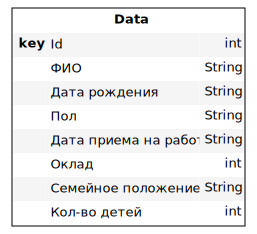

In [145]:
cube.schema

## Построение простых запросов

Расчет суммарного количества сотрудников:

In [146]:
cube.query(m["contributors.COUNT"])

,contributors.COUNT
0,100


Расчет среднего количества детей в расчете на одного сотрудника:

In [147]:
cube.query(m["Кол-во детей.MEAN"])

,Кол-во детей.MEAN
0,1.52


Расчет суммарного оклада всех сотрудников:

In [148]:
cube.query(m["Оклад.SUM"])

,Оклад.SUM
0,"440,400"


Но мы также можем нарезать куб, чтобы получить, например, оклад по полу сотрудников:

In [74]:
l["Пол"]

Level(_name='Пол', _column_name='Пол', _data_type=DataType(java_type='string', nullable=False), _hierarchy_coordinates=('Data', 'Пол'), _cube_name='Data', _java_api=<atoti._java_api.JavaApi object at 0x7f4a67ad3b20>, _order=NaturalOrder(ascending=True))

In [149]:
cube.query(m["Оклад.SUM"], levels=[l["Пол"]])

,Оклад.SUM
Пол,
ж,"256,100"
м,"184,300"


Средний оклад по полу:

In [150]:
cube.query(m["Оклад.MEAN"], levels=[l["Пол"]])

,Оклад.MEAN
Пол,
ж,"4,268.33"
м,"4,607.50"


Количество мужчин и женщин:

In [151]:
cube.query(m["contributors.COUNT"],levels=[l["Пол"]])

,contributors.COUNT
Пол,
ж,60
м,40


Можно вырезать одну фиксированную позицию - например, среднее количество детей у мужчин: 

In [152]:
cube.query(m["Кол-во детей.MEAN"],condition=l["Пол"] == "м")

,Кол-во детей.MEAN
0,1.52


Можно  разделить данные по нескольким  осям: например, взять суммарный оклад по полу в разбивке по семейному положению:

In [79]:
cube.query(m["Оклад.SUM"], levels=[l["Пол"], l["Семейное положение"]])

Оклад.SUM
Пол Семейное положение          
ж   замужем              178,100
    незамужем             60,200
    разведена             17,800
м   женат                113,700
    разведен              15,100
    холост                55,500

Данные операции можно комбинировать:

In [153]:
cube.query(m["Оклад.SUM"], levels=[l["Пол"], l["Семейное положение"]], condition=l["Пол"]=="ж")

Оклад.SUM
Пол Семейное положение          
ж   замужем              178,100
    незамужем             60,200
    разведена             17,800

## Визуализация, dashboard

До сих пор мы использовали cube.query() , который возвращает таблицу в виде кадра данных pandas, но лучшим способом визуализации многомерных данных является сводная таблица. С расширением JupyterLab от atoti можно выполнять расширенные и интерактивные визуализации, такие как сводные таблицы и диаграммы, непосредственно в своем блокноте, вызывая session.visualize().

Это создаст виджет и откроет вкладку atoti слева с инструментами для управления виджетом.

In [154]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

## Обогащение куба

Мы можем объединать разные таблицы (обогащать куб) по первичным ключам.

In [155]:
add_table=session.read_csv("data_add.csv")

In [157]:
add_table.head()

,Id,Возраст,Стаж
0,1,46,24
1,2,73,35
2,3,70,33
3,4,42,24
4,5,70,36


In [158]:
my_table.join(add_table,mapping={"Id":"Id"})

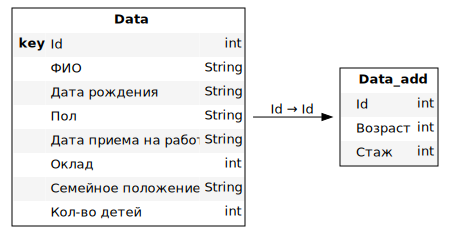

In [159]:
cube.schema

In [160]:
cube

Cube(_name='Data', _hierarchies=Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of ...>, _cube_name='Data'), _measures=Measures())

После объединения мы можем добавить новые меры с именами Возраст, Стаж на основе соответствующего столбца объединенной таблицы. Эта мера представляет значение столбца, поэтому она определяется только тогда, когда все ключи объединенной таблицы выражены в запросе.

In [161]:
m

Measures()

In [162]:
m["Стаж"] = tt.value(add_table["Стаж"])

In [163]:
m["Возраст"] = tt.value(add_table["Возраст"])
m

Measures()

Теперь мы можем каждому сотруднику сопоставить стаж и возраст:

In [164]:
cube.query(m["Стаж"],m["Возраст"],levels=[l["ФИО"]])

,Стаж,Возраст
ФИО,,
Алистратов А.А.,24,46
Анохин Н.И.,35,73
Антонова И.П.,33,70
Артемова Г.А.,24,42
Афоничева Л.В.,23,43
...,...,...
Шафеева Н.К.,36,82
Шиманюк Н.И.,23,42
Элиава Т.М.,24,40


Мы можем добавить новые агрегированные меры:

In [165]:
m["Стаж.Mean"]=tt.agg.mean(add_table["Стаж"])
m["Возраст.квантиль"]=tt.agg.quantile(add_table["Возраст"],0.75)
m

Measures()

Рассчитаем средний стаж для мужчин и женщин:

In [167]:
cube.query(m["Стаж.Mean"], levels=[l["Пол"]])

,Стаж.Mean
Пол,
ж,31.12
м,30.43


Визуализируем результат:

In [168]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Язык MDX

https://ru.wikipedia.org/wiki/MDX_(%D1%8F%D0%B7%D1%8B%D0%BA_%D0%B7%D0%B0%D0%BF%D1%80%D0%BE%D1%81%D0%BE%D0%B2)

In [ ]:
SELECT
  NON EMPTY Hierarchize(
    Descendants(
      {
        [Data].[Семейное положение].[AllMember]
      },
      1,
      SELF_AND_BEFORE
    )
  ) ON ROWS,
  NON EMPTY Crossjoin(
    Hierarchize(
      Descendants(
        {
          [Data].[Пол].[AllMember]
        },
        1,
        SELF_AND_BEFORE
      )
    ),
    {
      [Measures].[Возраст.квантиль]
    }
  ) ON COLUMNS
  FROM [Data]
  CELL PROPERTIES VALUE, FORMATTED_VALUE, BACK_COLOR, FORE_COLOR, FONT_FLAGS

## Детализация и фильтры, приложение

In [42]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

atoti поставляется с веб-приложением, к которому можно получить доступ за пределами ноутбука и в котором можно размещать виджеты для создания информационных панелей.

Приложение доступно по этой ссылке:

In [170]:
session.link()

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

## Многоуровневые иерархии

Рассмотрим, как создавать многоуровневые иерархии. 
До сих пор все наши иерархии имели только один уровень, но лучше перегруппировать атрибуты с отношениями родитель-потомок в одной иерархии.

В нашем примере есть иерархия "Пол", внутри которой можно поместить иерархию "Семейное положение".

Смотрим текущие иерархии:

In [171]:
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Data', _hierarchies=..., _measures=Measures())>, _cube_name='Data')

Создаем новую иерархию:

In [172]:
h["Семья"]=[l["Семейное положение"]]

In [173]:
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Data', _hierarchies=..., _measures=Measures())>, _cube_name='Data')

Удалим старые иерархии:

In [174]:
del h["Семейное положение"]

In [175]:
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Data', _hierarchies=..., _measures=Measures())>, _cube_name='Data')

In [176]:
l=cube.levels
l

Levels()

In [177]:
h["Личные данные"]=[l["Дата рождения"], l["Пол"]]
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Data', _hierarchies=..., _measures=Measures())>, _cube_name='Data')

In [178]:
del h["Пол"]
del h["Дата рождения"]
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Data', _hierarchies=..., _measures=Measures())>, _cube_name='Data')

In [179]:
l=cube.levels
l

Levels()

Можно перемещать иерархии по измерениям, создавая новые измерения:

In [180]:
h["Личные данные"].dimension="Личное"
h

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Data', _hierarchies=..., _measures=Measures())>, _cube_name='Data')

## Работа с мерами

Меры можно скрывать и удалять:

In [181]:
m

Measures()

In [182]:
del m["Оклад.SUM"]
m

Measures()

Меры можно скрыть из пользовательского интерфейса (они останутся доступными в Python):

In [183]:
m["contributors.COUNT"].visible = False
m

Measures()

Меры можно переупорядочивать в папки.

In [184]:
for measure in [
    m["Кол-во детей.MEAN"],
    m["Кол-во детей.SUM"]
]:
    measure.folder = "Дети"
    
m

Measures()

## Доступ к базе данных

Из atoti можно подключаться к разным базам данных. Для этого у сессии есть метод:

In [44]:
help(session.read_sql)

Help on method read_sql in module atoti.session:

read_sql(query: 'str', *, url: 'str', table_name: 'str', driver: 'Optional[str]' = None, keys: 'Iterable[str]' = (), partitioning: 'Optional[str]' = None, types: 'Mapping[str, DataType]' = {}, hierarchized_columns: 'Optional[Iterable[str]]' = None) -> 'Table' method of atoti.session.Session instance



Для подключения нужно использовать подходящий драйвер:

https://docs.atoti.io/latest/lib/atoti-sql/atoti_sql.drivers.html#module-atoti_sql.drivers

## Основы Linux/shell

**Общие команды**

1. Выдает текущую дату

> date

Помощь по команде:

> date --help

> date -h

Справочная система по команде:

> man date

> info date

2. Информация о системе:

> uname

> uname -a

3. Информация об исполуемой памяти:

> free

> free -s 1

4. Информация о состоянии системы:

> uptime

5. Календарная информация:

> cal

6. Определяет имя пользователя, который залогинился:

> whoami

7. Информация об использовании дисков

> df

8. Информация ЦПУ

> cat /proc/cpuinfo

8. Информация об используемой памяти

> cat /proc/meminfo



**Команды работы с файлами**

1. Текущее местоположение

> pwd

2. Изменение текущего каталога:

> cd путь

Если написать 

> cd 

то перейдем в домашний каталог пользователя

> cd ./путь

Точка означает текущее местоположение. 

>cd ../путь

Две точки означают от текущего местоположенния на уровень выше.

3. Просмотр текущего каталога:
    
    > ls
    
    > ls -a
    
    >ls -al
    
-rwxrwxr-x  1 juna juna   16696 апр 15 07:29  a.out

a.out обычный файл

Первая rwx - права доступа владельца файла, r - право на чтение, w - право на запись, x - право на выполнение

Вторая rwx - права группы владельца файла

Третья r-x - права остальных (нет права на запись)

Другая форма обозначения прав доступа - числовая нотация.

r-x - 101(5)
rwx - 111(7)
--x - 001(1)
-wr - 011(3)  

753 - rwxr-x-wx

Если drwxrwxr-w - это каталог. В Linux все есть файл. Каталог - это специальный файл.

Кроме - и d, могут встречаться: l - ссылка, b - блочное устройство, c - символьное устройство.

4. Создание каталога

> mkdir name



5. Создание файла (текстовый файл):
    
> touch имя

6. Копирование файла:
    
    > cp путь_к_файлу(что) путь_к_приемнику_файла(куда)
    
При копировании каталогов необходимо указывать ключ -r

7. Перемещение файла:

> mv путь_к_файлу(что) путь_к_приемнику_файла(куда)

8. Переименования файла:
    
    > mv путь_к_файлу(что) тот_же_самый_путь_к_файлу_новое имя

9. Удаление файлов:
    
    > rmdir имя_каталога (каталог должен быть пустым)
    
    >rm Имя_файла_для_удаления
    
Для удаления непустой директории со всем ее содержимым необходимо использовать тот же rm с ключем r:
    
    > rm -r имя_каталога

10. Создание символической ссылки:

> ln-s имя_файла имя_ссылки

11. Просмотр содержимого файла:
    
    > cat имя_файла
    
    > more имя_файла (для просмотра больших текстовых файлов)
    
    > head -n count имя_файла - показывает первые count строк файла
    
    > tail -n count имя_файла - показывает последние count строк файла

12. Перенаправление ввода/вывода

> cat имя_файла_1 > имя_файла_2: содержимое файла 1 запишется в содержимое файла 2

Если файл с именем "имя_файла_2" уже был, то он полностью перезаписываеся

> cat имя_файла_1 >> имя_файла_2: содержимое файла 1 допишется  к содержимому файла 2

> cat < имя_файла - передать на вход программе содержимое файла

In [ ]:
mysql -u juna -p -h localhost psr < /home/dima/programs_dump.sql

13. Использование каналов

Канал  - программный интерфейс, позволяющий обмениваться данными разным процессам

cat имя_файла | head -n 2 | more

14. grep - специальная утилита по фильтрации текста

> grep шаблон имя_файла



### Команды работы с процессами

**Процесс** - запущенная в операционной системе программа, использующая при своей работе ресурсы процессора и оперативной памяти.

1. Просмотр списка процессов:
    
    > ps - процессы, запущенные в текущей консоли

    > ps uax - получить список всех процессов
    
2. Команды управления процессами.

Жизненный цикл процесса: создание, загрузка, выполнение, состояние зомби, умирание процесса.

Можно управлять процессами с помощью сигналов.

> kill signal  PID - посылает сигнал процессу с идентификаторов PID

> kill 9 PID - убивает процесс

    

## Команды архивации

Архиватор tar

> tar -cf имя_архива.tar список файлов #архивация файлов

> tar -xf имя_архива.tar #разархивирует файлы

>  gzip имя_файла #сжимает файл

> gzip -d имя_файла #выполняет декомпрессию файла



## Командные оболочки

1. Переменные:

Присвоить значение перерменной:

d=1234

Напечатать значение переменной:

echo $d

Системные переменные:

PATH, PWD, HOME, SHELL, USER, HOSTNAME

Все значения переменных воспринимаются как просто текст. Если текст разделен пробелами, то нужно использовать экранирование:

или знак \, или ", или '.

Одинарные кавычки экранируют все символы, двойные кавычки не экранируют специальные символы.

2. Состав командных оболочек:
    
    наиболее продвинутая bash
    
 Остальные:   https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D0%BD%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BE%D0%BB%D0%BE%D1%87%D0%BA%D0%B0_Unix
 
Командные оболочки помогают использовать язык Shell.



3. Операции сравнения

В случае, если условие верно, оператор сравнения возвращает 0. Проверить возвращаемое значение можно с помощью $?

К скрипту можно передавать параметры. Для их получения в программе используются:
    
    $0 - имя скрипта
    
    $1 - первый параметр
    
    $2 - второй параметр и т.д.

4. Условная конструкция:


5. Циклы

## Монтирование файлов